In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:\\Users\\DELL\\Desktop\\Predective maintainance\\dataset\\ai4i2020.csv')

In [3]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [6]:
label_col = "Machine failure"

groups = dict(tuple(data.groupby(label_col)))
df_label_0 = groups.get(0, pd.DataFrame())
df_label_1 = groups.get(1, pd.DataFrame())

print("rows label 0:", len(df_label_0))
print("rows label 1:", len(df_label_1))

rows label 0: 9661
rows label 1: 339


In [7]:
target_col = "Machine failure"  

agg_df = data.groupby(target_col).agg(
    count=("UDI", "count"),
    air_temp_mean=("Air temperature [K]", "mean"),
    process_temp_mean=("Process temperature [K]", "mean"),
    torque_mean=("Torque [Nm]", "mean"),
    speed_mean=("Rotational speed [rpm]", "mean"),
    tool_wear_mean=("Tool wear [min]", "mean"),
)
agg_df


,count,air_temp_mean,process_temp_mean,torque_mean,speed_mean,tool_wear_mean
Machine failure,,,,,,
0,9661,299.973999,309.995570,39.629655,1540.260014,106.693717
1,339,300.886431,310.290265,50.168142,1496.486726,143.781711


In [8]:
# assumes ai4i2020 column names from the dataset
target_col = "Machine failure"
failure_cols = ["TWF", "HDF", "PWF", "OSF", "RNF"]

# aggregate counts of each failure mode by target label
agg_df = data.groupby(target_col)[failure_cols].sum()
agg_df


,TWF,HDF,PWF,OSF,RNF
Machine failure,,,,,
0,0,0,0,0,18
1,46,115,95,98,1


In [9]:
data[data['Machine failure'] == 1].head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
168,169,L47348,L,298.4,308.3,1433,62.3,20,1,0,0,1,0,0
194,195,M15054,M,298.2,308.5,2678,10.7,86,1,0,0,1,0,0
207,208,M15067,M,298.4,308.7,1421,60.7,119,1,0,0,1,0,0
242,243,L47422,L,298.0,308.2,1348,58.8,202,1,0,0,0,1,0
248,249,L47428,L,298.0,308.3,1362,56.8,216,1,0,0,0,1,0


In [10]:
pid_letter = data["Product ID"].str[0]
mask = pid_letter != data["Type"]
mismatched = data.loc[mask, ["Product ID", "Type"]]

mismatched


,Product ID,Type


In [11]:
# rows where Machine failure == 1 and all five failure modes == 0
failure_cols = ["TWF", "HDF", "PWF", "OSF", "RNF"]

mask = (data["Machine failure"] == 1) & (data[failure_cols].sum(axis=1) == 0)
rows = data.loc[mask]

rows



,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
1437,1438,H30851,H,298.8,309.9,1439,45.2,40,1,0,0,0,0,0
2749,2750,M17609,M,299.7,309.2,1685,28.9,179,1,0,0,0,0,0
4044,4045,M18904,M,301.9,310.9,1419,47.7,20,1,0,0,0,0,0
4684,4685,M19544,M,303.6,311.8,1421,44.8,101,1,0,0,0,0,0
5536,5537,M20396,M,302.3,311.8,1363,54.0,119,1,0,0,0,0,0
5941,5942,L53121,L,300.6,310.7,1438,48.5,78,1,0,0,0,0,0
6478,6479,L53658,L,300.5,309.8,1663,29.1,145,1,0,0,0,0,0
8506,8507,L55686,L,298.4,309.6,1710,27.3,163,1,0,0,0,0,0
9015,9016,L56195,L,297.2,308.1,1431,49.7,210,1,0,0,0,0,0


In [12]:
print(f'{len(rows)} rows where Machine failure == 1 and all five failure modes == 0')

9 rows where Machine failure == 1 and all five failure modes == 0


In [13]:
failure_cols = ["TWF", "HDF", "PWF", "OSF", "RNF"]

mask = (data["Machine failure"] == 0) & (data[failure_cols].sum(axis=1) == 1)
rows = data.loc[mask]

rows


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
1221,1222,M16081,M,297.0,308.3,1399,46.4,132,0,0,0,0,0,1
1302,1303,L48482,L,298.6,309.8,1505,45.7,144,0,0,0,0,0,1
1748,1749,H31162,H,298.4,307.7,1626,31.1,166,0,0,0,0,0,1
2072,2073,L49252,L,299.6,309.5,1570,35.5,189,0,0,0,0,0,1
2559,2560,L49739,L,299.3,309.0,1447,50.4,140,0,0,0,0,0,1
3065,3066,M17925,M,300.1,309.2,1687,27.7,95,0,0,0,0,0,1
3452,3453,H32866,H,301.6,310.5,1602,32.3,2,0,0,0,0,0,1
5471,5472,L52651,L,302.7,312.3,1346,61.2,170,0,0,0,0,0,1
5489,5490,L52669,L,302.6,312.1,1499,35.0,215,0,0,0,0,0,1
5495,5496,H34909,H,302.9,312.5,1357,55.0,12,0,0,0,0,0,1


In [14]:
print(f'{len(rows)} rows where Machine failure == 0 and exactly one failure mode == 1')

18 rows where Machine failure == 0 and exactly one failure mode == 1


In [15]:
failure_cols = ["TWF", "HDF", "PWF", "OSF", "RNF"]

mask1 = (data["Machine failure"] == 1) & (data[failure_cols].sum(axis=1) == 0)
mask2 = (data["Machine failure"] == 0) & (data[failure_cols].sum(axis=1) == 1)

df_pre = data.loc[~(mask1 | mask2)].copy()

In [16]:
df_pre.shape

(9973, 14)

In [17]:
df_pre.drop(columns=["RNF","UDI","Product ID"], inplace=True)

In [18]:
df_pre.reset_index(inplace=True, drop=True)

In [19]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9973 entries, 0 to 9972
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     9973 non-null   object 
 1   Air temperature [K]      9973 non-null   float64
 2   Process temperature [K]  9973 non-null   float64
 3   Rotational speed [rpm]   9973 non-null   int64  
 4   Torque [Nm]              9973 non-null   float64
 5   Tool wear [min]          9973 non-null   int64  
 6   Machine failure          9973 non-null   int64  
 7   TWF                      9973 non-null   int64  
 8   HDF                      9973 non-null   int64  
 9   PWF                      9973 non-null   int64  
 10  OSF                      9973 non-null   int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 857.2+ KB


In [20]:
df_pre.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0


In [21]:
df_pre.rename(columns={
    "Air temperature [K]": "Air temperature",
    "Process temperature [K]": "Process temperature",
    "Rotational speed [rpm]": "Rotational speed",
    "Torque [Nm]": "Torque",
    "Tool wear [min]": "Tool wear",
}, inplace=True)


In [22]:
df_pre.shape

(9973, 11)

In [23]:
failure_cols = ["TWF", "HDF", "PWF", "OSF"]

rows_multi = df_pre.loc[df_pre[failure_cols].sum(axis=1) > 1]
rows_multi

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF
69,L,298.9,309.0,1410,65.7,191,1,0,0,1,1
1322,M,298.8,310.1,1243,74.5,194,1,0,0,1,1
1493,L,298.0,308.7,1268,69.4,189,1,0,0,1,1
3845,L,302.4,311.0,1338,67.6,194,1,0,0,1,1
3934,L,302.3,311.4,1333,66.7,205,1,0,0,1,1
4244,L,302.6,311.0,1284,68.0,114,1,0,1,1,0
4332,M,301.7,309.8,1284,68.2,111,1,0,1,1,0
4360,L,302.0,309.9,1308,57.6,197,1,0,1,0,1
4373,L,301.7,309.5,1298,65.5,229,1,0,1,0,1
4407,L,302.6,310.4,1365,66.8,80,1,0,1,1,0


In [24]:
print(f'{len(rows_multi)} rows where Machine failure has multiple failure modes')

23 rows where Machine failure has multiple failure modes


In [25]:
failure_cols = ["TWF", "HDF", "PWF", "OSF"]

# remove rows with multiple failure modes
df = df_pre.loc[df_pre[failure_cols].sum(axis=1) <= 1].copy()

# create failure type label (single mode or None)
df["failure type"] = df[failure_cols].idxmax(axis=1).where(df[failure_cols].sum(axis=1) == 1, "None")


In [26]:
df_pre= df.copy()
df_pre.shape

(9950, 12)

In [27]:
df_pre

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,failure type
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,None
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,None
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,None
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,None
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...
9968,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,None
9969,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,None
9970,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,None
9971,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,None


In [28]:
df_pre.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF
count,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.000000,9950.00000,9950.000000
mean,300.001095,310.003598,1539.371658,39.921980,107.726533,0.030854,0.004322,0.010653,0.00804,0.007839
std,1.999838,1.484144,179.317627,9.903597,63.564521,0.172931,0.065600,0.102669,0.08931,0.088196
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,298.300000,308.800000,1424.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,300.100000,310.100000,1504.000000,40.000000,108.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,301.500000,311.100000,1612.000000,46.700000,162.000000,0.000000,0.000000,0.000000,0.00000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,251.000000,1.000000,1.000000,1.000000,1.00000,1.000000


# EDA 

In [29]:
features = ['Type','Air temperature','Process temperature',
            'Rotational speed','Torque','Tool wear']
target = ['Machine failure','failure type']

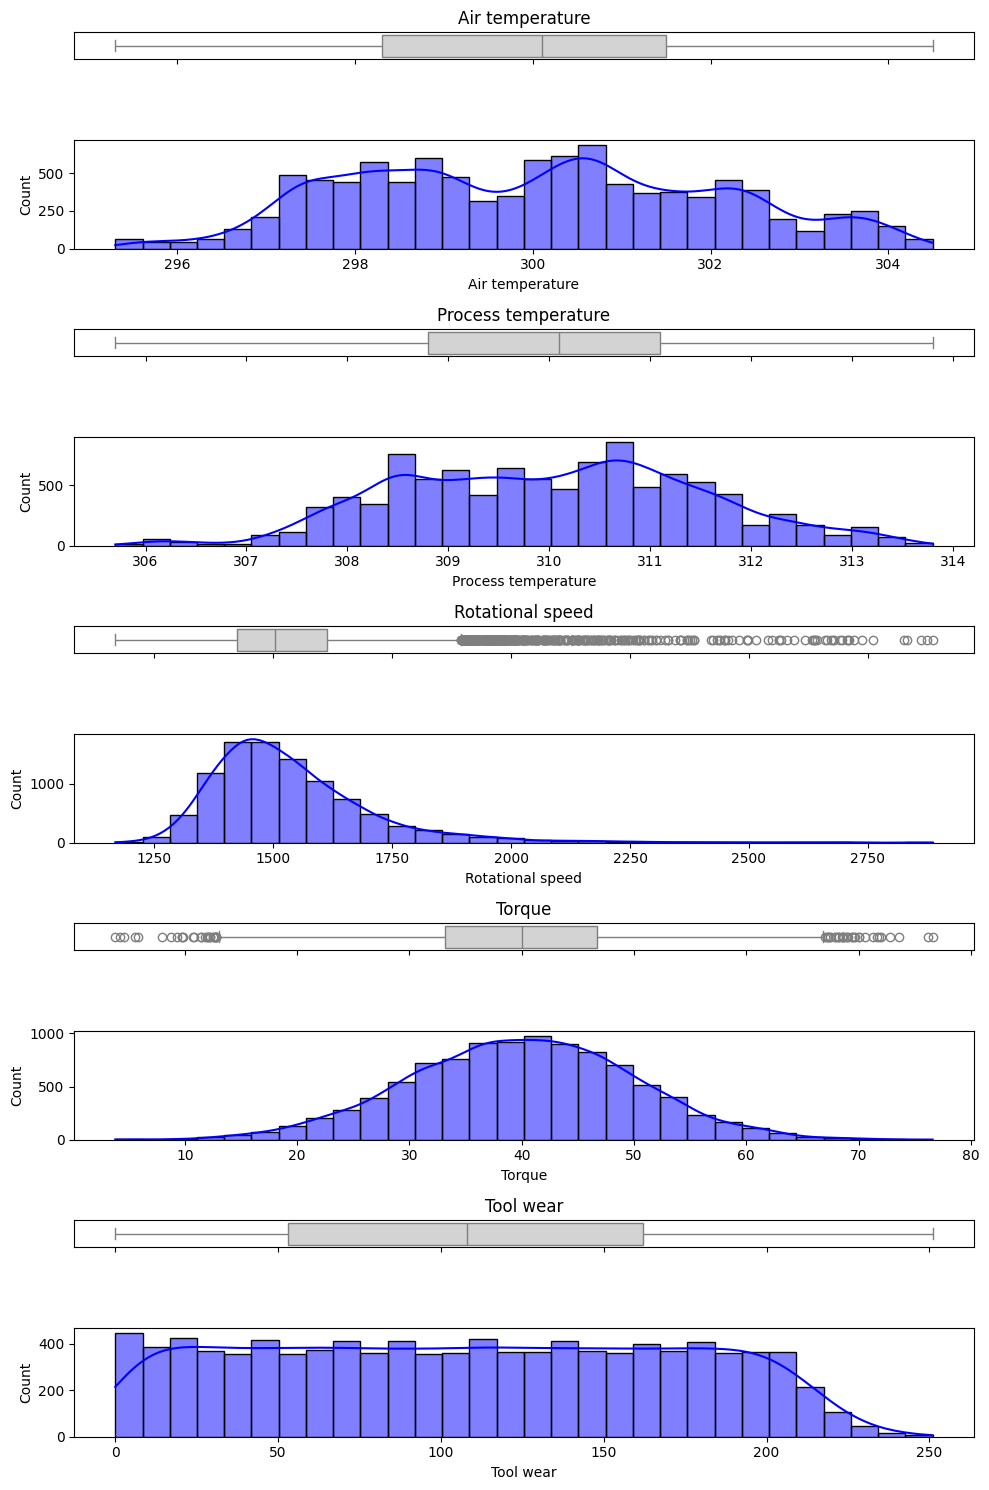

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = df_pre[features].select_dtypes(include=["number"]).columns.tolist()

n = len(num_features)
fig = plt.figure(figsize=(10, 3*n))

gs = fig.add_gridspec(nrows=2*n, ncols=1, height_ratios=[1,4]*n)

for i, col in enumerate(num_features):
    ax_box = fig.add_subplot(gs[2*i, 0])
    ax_hist = fig.add_subplot(gs[2*i+1, 0], sharex=ax_box)

    sns.boxplot(x=df_pre[col], ax=ax_box, color="lightgray")
    sns.histplot(df_pre[col], bins=30, ax=ax_hist,kde=True, color="blue")

    ax_box.set_title(col)
    ax_box.set_yticks([])
    ax_box.set_xlabel("")
    plt.setp(ax_box.get_xticklabels(), visible=False)

plt.tight_layout()
plt.show()


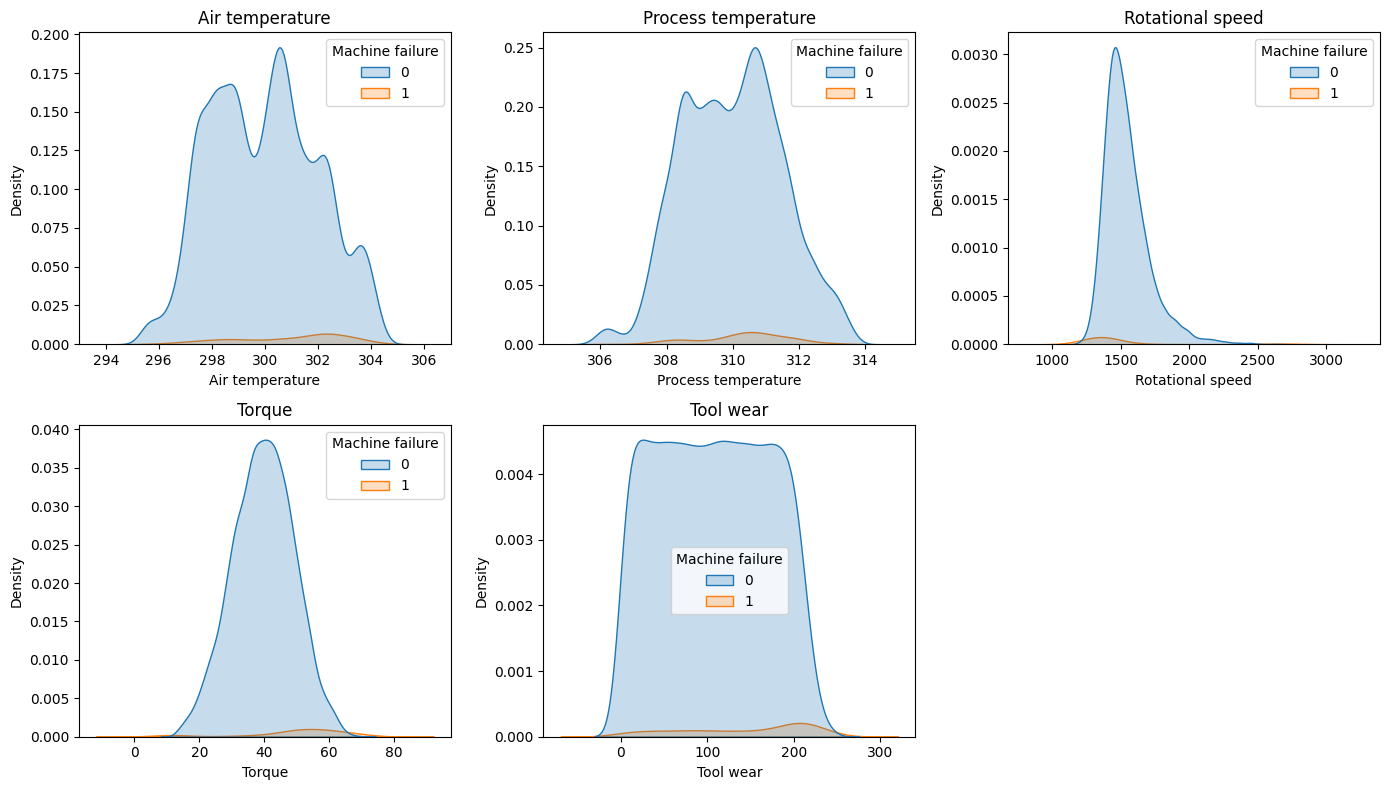

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = df_pre[features].select_dtypes(include=["number"]).columns
n = len(num_features)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows))
axes = axes.flatten()

for ax, col in zip(axes, num_features):
    sns.kdeplot(data=df_pre, x=col, hue="Machine failure", fill=True, common_norm=True, ax=ax)
    ax.set_title(col)

for ax in axes[n:]:
    ax.axis("off")

plt.tight_layout()
plt.show()


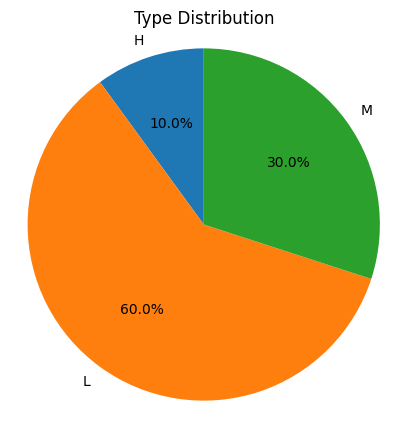

In [32]:
import matplotlib.pyplot as plt

counts = df_pre["Type"].value_counts().sort_index()

plt.figure(figsize=(5,5))
plt.pie(
    counts,
    labels=counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Type Distribution")
plt.axis("equal")
plt.show()


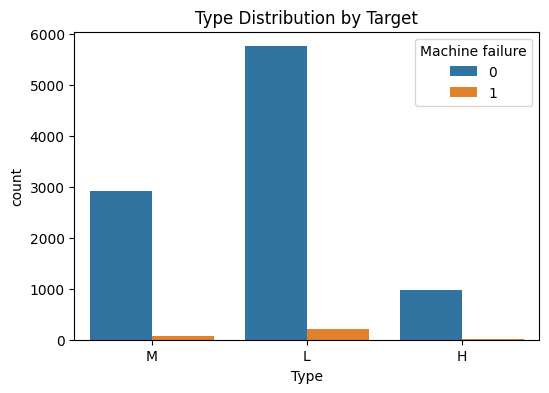

In [33]:

import seaborn as sns
import matplotlib.pyplot as plt

target_col = "Machine failure"  # adjust if needed

plt.figure(figsize=(6,4))
sns.countplot(data=df_pre, x="Type", hue=target_col)
plt.title("Type Distribution by Target")
plt.show()


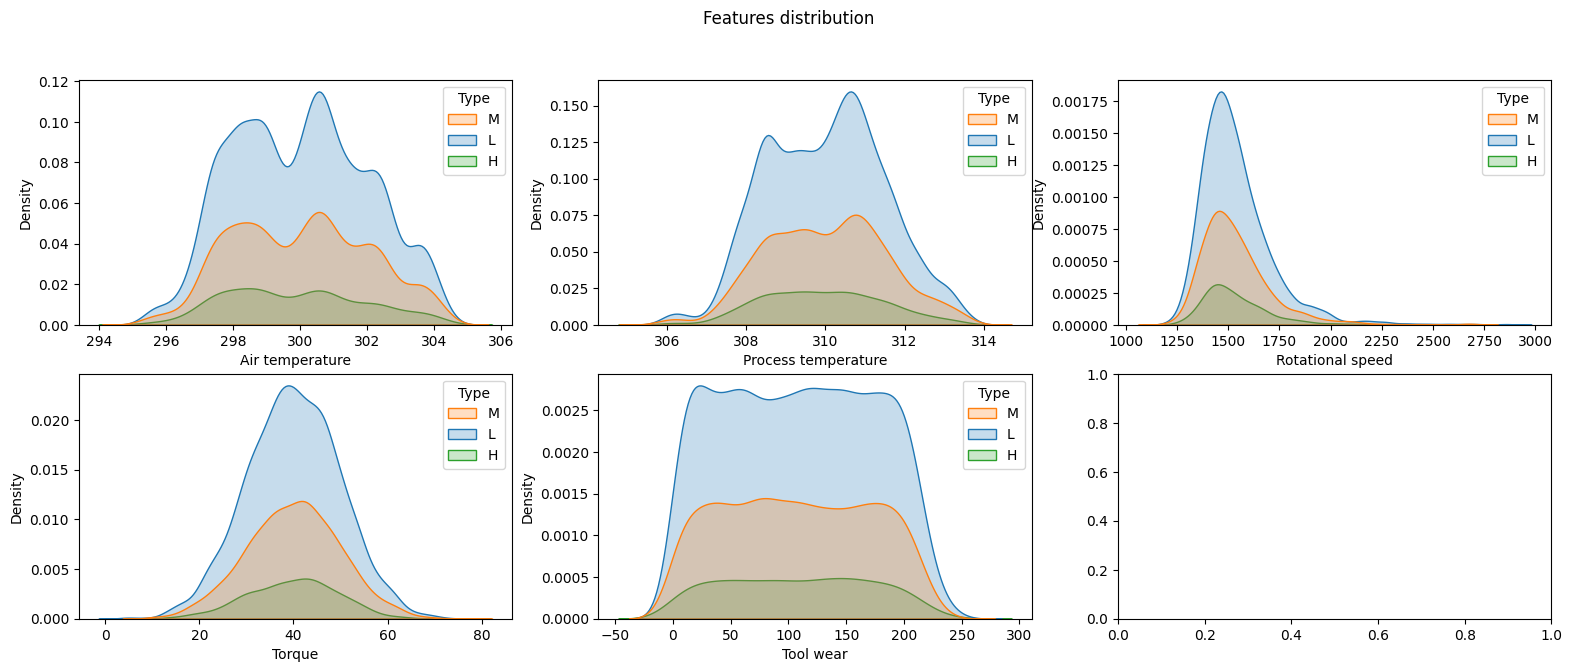

In [34]:

num_features = df_pre[features].select_dtypes(include=["number"]).columns
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(19,7))
fig.suptitle('Features distribution ')
custom_palette = {'L':'tab:blue', 'M':'tab:orange', 'H':'tab:green'}
for j, feature in enumerate(num_features):
    sns.kdeplot(ax=axs[j//3, j-3*(j//3)], data=df_pre, x=feature,
              hue='Type', fill=True, palette=custom_palette)
plt.show()

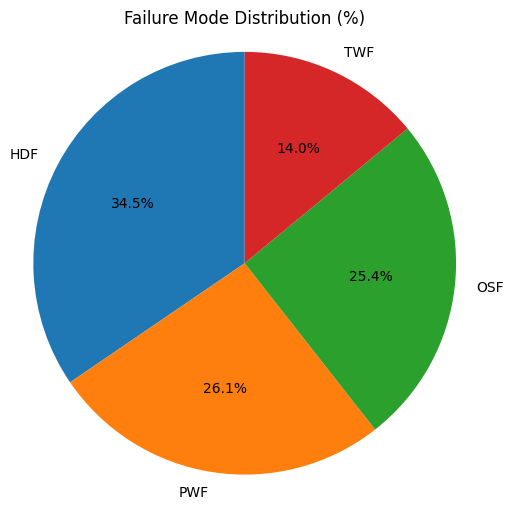

In [35]:
import matplotlib.pyplot as plt

counts = df.loc[df["failure type"] != "None", "failure type"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Failure Mode Distribution (%)")
plt.axis("equal")
plt.show()


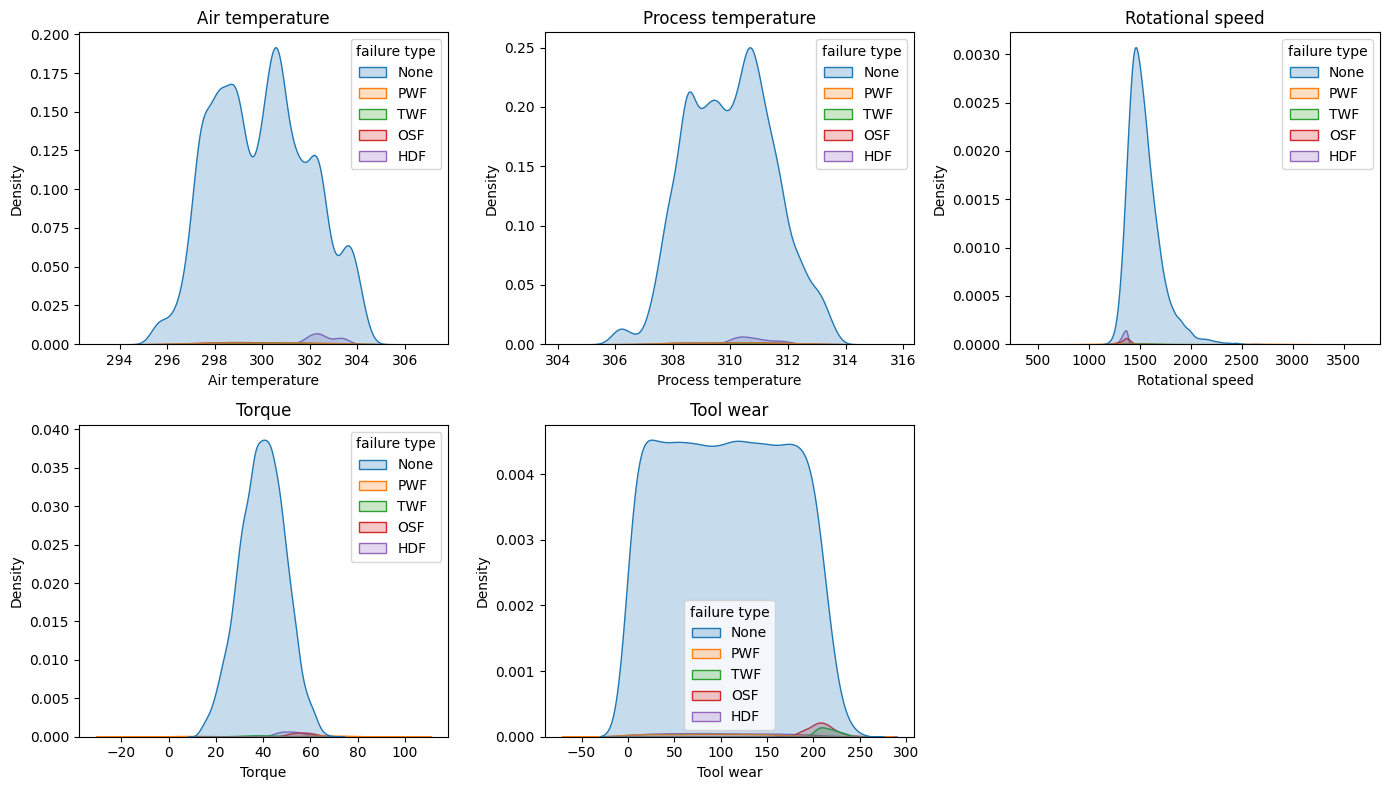

In [36]:


num_features = df_pre[features].select_dtypes(include=["number"]).columns
n = len(num_features)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows))
axes = axes.flatten()

for ax, col in zip(axes, num_features):
    sns.kdeplot(data=df_pre, x=col, hue="failure type", fill=True, common_norm=True, ax=ax)
    ax.set_title(col)

for ax in axes[n:]:
    ax.axis("off")

plt.tight_layout()
plt.show()


# Oversample dataset

In [37]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC

# Count of "None" (no failure) samples - this will be 80% of final dataset
n_working = df_pre['failure type'].value_counts()['None']
desired_length = round(n_working / 0.8)
spc = round((desired_length - n_working) / 4)  # samples per class (4 failure types)

# Define target distribution for each class
balance_strategy = {
    'None': n_working,
    'OSF': spc,   # Overstrain Failure
    'HDF': spc,   # Heat Dissipation Failure
    'PWF': spc,   # Power Failure
    'TWF': spc    # Tool Wear Failure
}

# Prepare features and target
X = df_pre.drop(columns=['Machine failure', 'failure type', 'TWF', 'HDF', 'PWF', 'OSF'])
y = df_pre['failure type']

# Find index of categorical column ('Type')
cat_idx = [X.columns.get_loc('Type')]

# Apply SMOTENC
sm = SMOTENC(categorical_features=cat_idx, sampling_strategy=balance_strategy, random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Create resampled DataFrame
df_resampled = X_res.copy()
df_resampled['failure type'] = y_res
df_resampled['Machine failure'] = (y_res != 'None').astype(int)

print(f"Original shape: {df_pre.shape}")
print(f"Resampled shape: {df_resampled.shape}")
print(f"\nClass distribution after resampling:")
print(df_resampled['failure type'].value_counts())

Original shape: (9950, 12)
Resampled shape: (12055, 8)

Class distribution after resampling:
failure type
None    9643
PWF      603
TWF      603
OSF      603
HDF      603
Name: count, dtype: int64


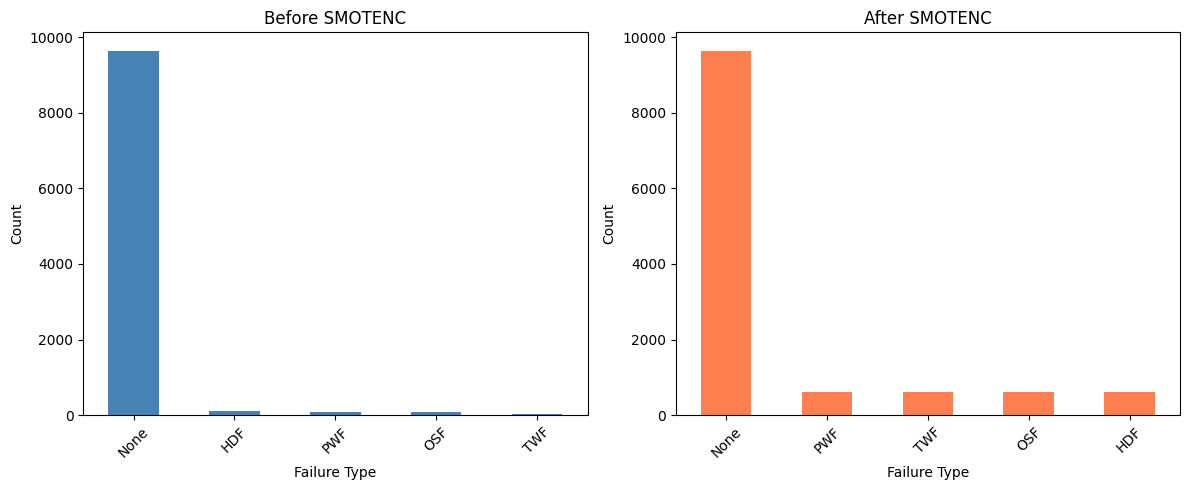

In [38]:
# Visualize the resampled class distribution
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before resampling
df_pre['failure type'].value_counts().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Before SMOTENC')
axes[0].set_xlabel('Failure Type')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# After resampling
df_resampled['failure type'].value_counts().plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('After SMOTENC')
axes[1].set_xlabel('Failure Type')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [39]:
df_resampled.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,failure type,Machine failure
0,M,298.1,308.6,1551,42.8,0,None,0
1,L,298.2,308.7,1408,46.3,3,None,0
2,L,298.1,308.5,1498,49.4,5,None,0
3,L,298.2,308.6,1433,39.5,7,None,0
4,L,298.2,308.7,1408,40.0,9,None,0


In [40]:
# Display count for each failure type
print("Failure Type Distribution:")
print("-" * 30)
print(df_resampled['failure type'].value_counts())
print(f"\nTotal rows: {len(df_resampled)}")

print("\n" + "=" * 30)

# Display count for Machine failure (binary)
print("\nMachine Failure Distribution:")
print("-" * 30)
print(df_resampled['Machine failure'].value_counts().rename({0: 'No Failure (0)', 1: 'Failure (1)'}))

Failure Type Distribution:
------------------------------
failure type
None    9643
PWF      603
TWF      603
OSF      603
HDF      603
Name: count, dtype: int64

Total rows: 12055


Machine Failure Distribution:
------------------------------
Machine failure
No Failure (0)    9643
Failure (1)       2412
Name: count, dtype: int64


In [41]:
# Detailed distribution with percentages
print("=" * 50)
print("FAILURE TYPE DISTRIBUTION")
print("=" * 50)
counts = df_resampled['failure type'].value_counts()
for label, count in counts.items():
    pct = count / len(df_resampled) * 100
    print(f"{label:20s}: {count:5d} rows ({pct:5.2f}%)")

print("\n" + "=" * 50)
print("MACHINE FAILURE DISTRIBUTION (Binary)")
print("=" * 50)
counts_binary = df_resampled['Machine failure'].value_counts()
labels = {0: 'No Failure', 1: 'Failure'}
for label, count in counts_binary.items():
    pct = count / len(df_resampled) * 100
    print(f"{labels[label]:20s}: {count:5d} rows ({pct:5.2f}%)")

FAILURE TYPE DISTRIBUTION
None                :  9643 rows (79.99%)
PWF                 :   603 rows ( 5.00%)
TWF                 :   603 rows ( 5.00%)
OSF                 :   603 rows ( 5.00%)
HDF                 :   603 rows ( 5.00%)

MACHINE FAILURE DISTRIBUTION (Binary)
No Failure          :  9643 rows (79.99%)
Failure             :  2412 rows (20.01%)


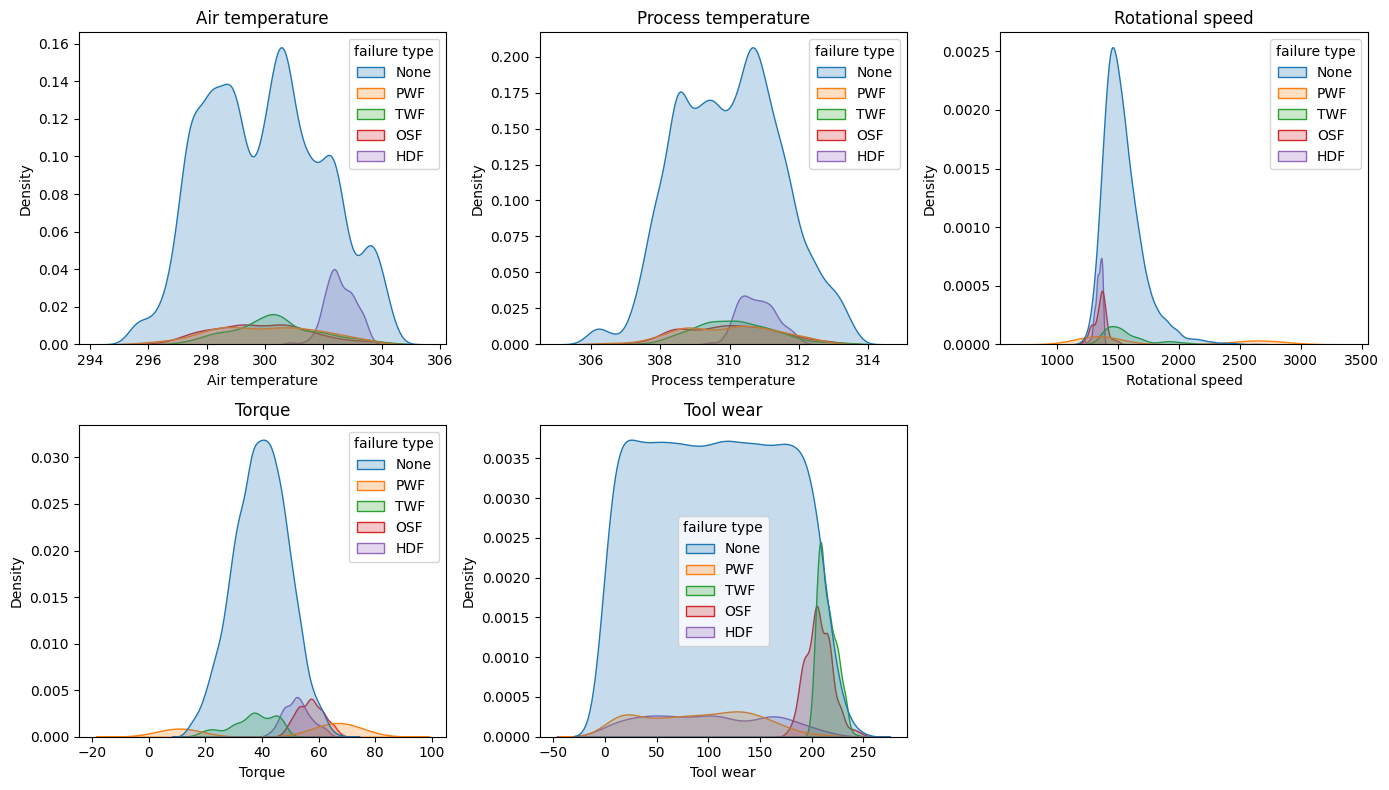

In [42]:
num_features = df_resampled[features].select_dtypes(include=["number"]).columns
n = len(num_features)
cols = 3
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 4*rows))
axes = axes.flatten()

for ax, col in zip(axes, num_features):
    sns.kdeplot(data=df_resampled, x=col, hue="failure type", fill=True, common_norm=True, ax=ax)
    ax.set_title(col)

for ax in axes[n:]:
    ax.axis("off")

plt.tight_layout()
plt.show()


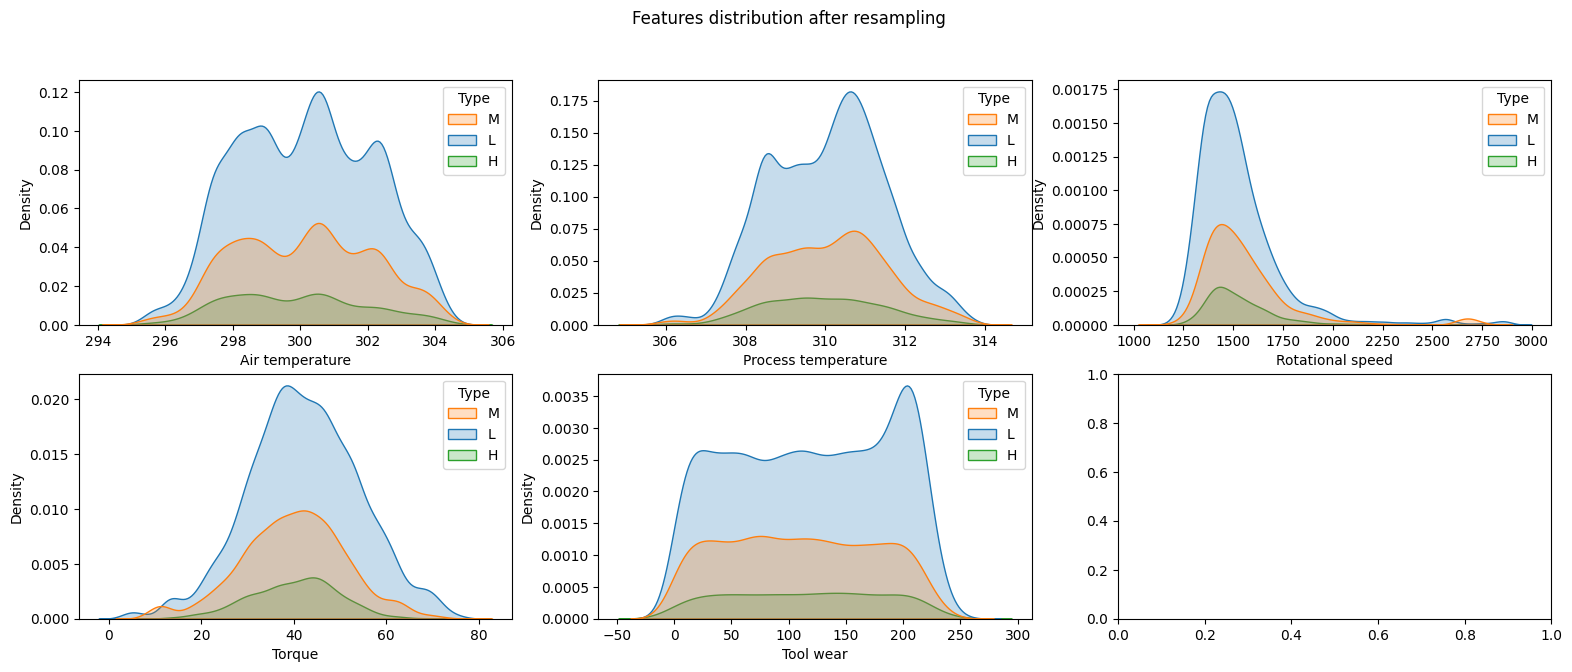

In [43]:

num_features = df_resampled[features].select_dtypes(include=["number"]).columns
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(19,7))
fig.suptitle('Features distribution after resampling ')
custom_palette = {'L':'tab:blue', 'M':'tab:orange', 'H':'tab:green'}
for j, feature in enumerate(num_features):
    sns.kdeplot(ax=axs[j//3, j-3*(j//3)], data=df_resampled, x=feature,
              hue='Type', fill=True, palette=custom_palette)
plt.show()

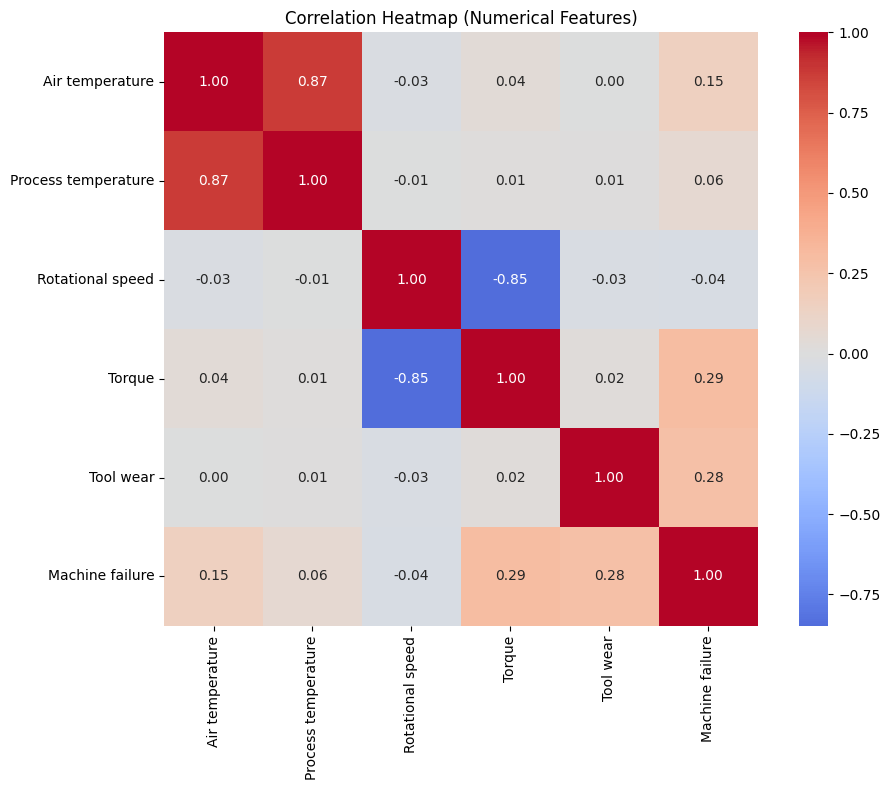

In [44]:



num_df = df_resampled.select_dtypes(include=["number"]).copy()
corr = num_df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, square=True)
plt.title("Correlation Heatmap (Numerical Features)")
plt.tight_layout()
plt.show()


# PCA

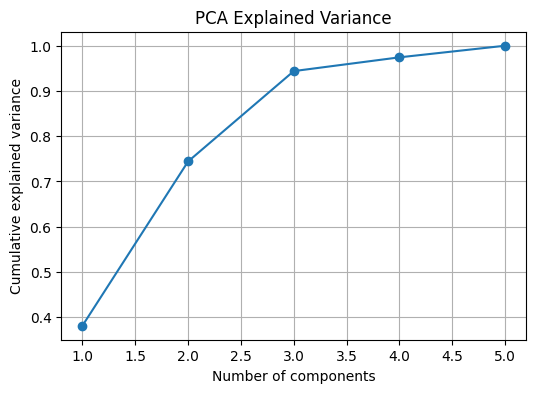

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# numeric features only (drop targets/labels)
X = df_resampled.select_dtypes(include=["number"]).drop(columns=["Machine failure"], errors="ignore")

# scale
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# explained variance plot
plt.figure(figsize=(6,4))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker="o")
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("PCA Explained Variance")
plt.grid(True)
plt.show()


In [46]:


# numeric features only (drop target)
X = df_resampled.select_dtypes(include=["number"]).drop(columns=["Machine failure"], errors="ignore")

# scale then fit PCA with 3 components
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=3, random_state=0)
X_pca3 = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", pca.explained_variance_ratio_.sum())


Explained variance ratio: [0.38134169 0.36295879 0.19962551]
Cumulative explained variance: 0.9439259858981259


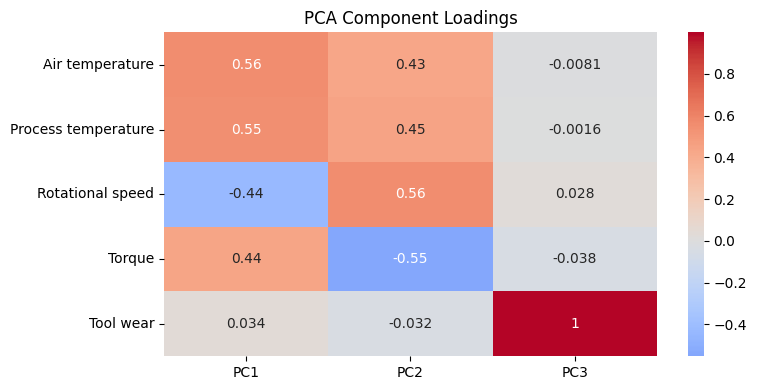

,PC1,PC2,PC3
Air temperature,0.559720,0.431781,-0.008106
Process temperature,0.549426,0.445533,-0.001560
Torque,0.439612,-0.552587,-0.037947
Rotational speed,-0.436355,0.555576,0.028027
Tool wear,0.034345,-0.032382,0.998853


In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# feature loadings (what each PC is made of)
loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,
    columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)]
)

plt.figure(figsize=(8, max(4, 0.35*len(loadings))))
sns.heatmap(loadings, cmap="coolwarm", center=0,annot=True)
plt.title("PCA Component Loadings")
plt.tight_layout()
plt.show()

loadings.sort_values("PC1", key=lambda s: s.abs(), ascending=False).head(10)


In [48]:

pca_names = [
    "Thermal_Stress_Index",  # PC1: High Temps + High Torque
    "Speed_vs_Force",        # PC2: High Speed vs High Torque
    "Tool_Health_Index"      # PC3: Tool Wear
]

# Create a DataFrame with the named components
df_pca_named = pd.DataFrame(
    X_pca3, 
    columns=pca_names
)

# Add the target variable back for visualization
df_pca_final = pd.concat([
    df_pca_named, 
    df_resampled['failure type'].reset_index(drop=True)
], axis=1)

df_pca_final.head()

,Thermal_Stress_Index,Speed_vs_Force,Tool_Health_Index,failure type
0,-1.156458,-0.861922,-1.716813,None
1,-0.682389,-1.325399,-1.701703,None
2,-0.842685,-1.336241,-1.670272,None
3,-1.021740,-0.976479,-1.617009,None
4,-0.915697,-1.031170,-1.592083,None


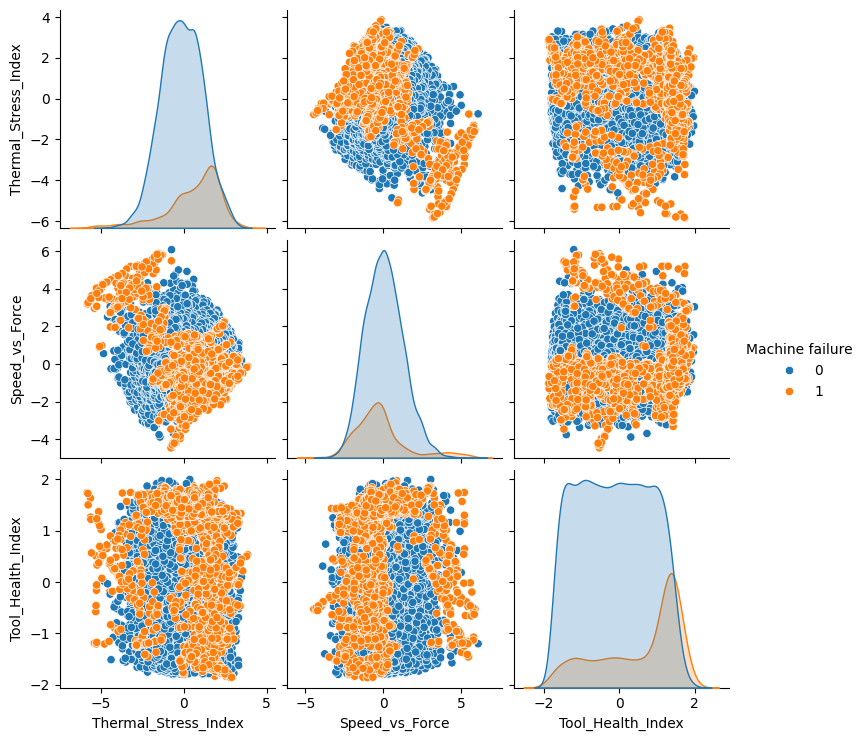

In [49]:

df_plot = df_pca_final.join(df_resampled["Machine failure"])
sns.pairplot(
	df_plot,
	vars=["Thermal_Stress_Index", "Speed_vs_Force", "Tool_Health_Index"],
	hue="Machine failure",
	corner=False
)
plt.show()

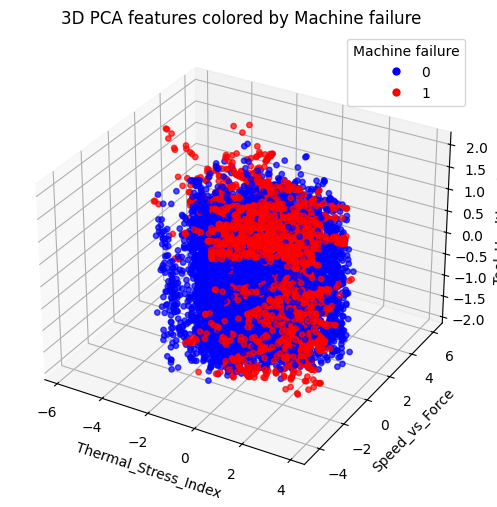

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection="3d")

y = df_resampled["Machine failure"].to_numpy()

colors = np.where(y == 1, "red", "blue")

ax.scatter(
    df_pca_final["Thermal_Stress_Index"],
    df_pca_final["Speed_vs_Force"],
    df_pca_final["Tool_Health_Index"],
    c=colors, s=15, alpha=0.7
)

ax.set_xlabel("Thermal_Stress_Index")
ax.set_ylabel("Speed_vs_Force")
ax.set_zlabel("Tool_Health_Index")
ax.set_title("3D PCA features colored by Machine failure")

legend_elems = [
    Line2D([0], [0], marker="o", color="w", label="0", markerfacecolor="blue", markersize=7),
    Line2D([0], [0], marker="o", color="w", label="1", markerfacecolor="red", markersize=7),
]
ax.legend(handles=legend_elems, title="Machine failure")

plt.show()


# Binary classification

In [51]:
df_binary=df_resampled.copy()
df_binary.head()    

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,failure type,Machine failure
0,M,298.1,308.6,1551,42.8,0,None,0
1,L,298.2,308.7,1408,46.3,3,None,0
2,L,298.1,308.5,1498,49.4,5,None,0
3,L,298.2,308.6,1433,39.5,7,None,0
4,L,298.2,308.7,1408,40.0,9,None,0


In [52]:
df_binary.drop(columns=['failure type'], inplace=True)

In [53]:
df_binary

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure
0,M,298.100000,308.600000,1551,42.800000,0,0
1,L,298.200000,308.700000,1408,46.300000,3,0
2,L,298.100000,308.500000,1498,49.400000,5,0
3,L,298.200000,308.600000,1433,39.500000,7,0
4,L,298.200000,308.700000,1408,40.000000,9,0
...,...,...,...,...,...,...,...
12050,L,300.183086,310.902076,1528,38.530266,211,1
12051,L,304.232941,313.350695,1507,36.670591,209,1
12052,L,299.550889,309.384165,1851,23.841997,225,1
12053,L,300.858312,311.824711,1523,38.529332,214,1


In [54]:
# map Type (L/M/H) to numeric labels
type_map = {"L": 0, "M": 1, "H": 2}
df_binary["Type_label"] = df_binary["Type"].map(type_map)



In [55]:
df_binary.drop(columns=['Type'], inplace=True)
df_binary

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,Type_label
0,298.100000,308.600000,1551,42.800000,0,0,1
1,298.200000,308.700000,1408,46.300000,3,0,0
2,298.100000,308.500000,1498,49.400000,5,0,0
3,298.200000,308.600000,1433,39.500000,7,0,0
4,298.200000,308.700000,1408,40.000000,9,0,0
...,...,...,...,...,...,...,...
12050,300.183086,310.902076,1528,38.530266,211,1,0
12051,304.232941,313.350695,1507,36.670591,209,1,0
12052,299.550889,309.384165,1851,23.841997,225,1,0
12053,300.858312,311.824711,1523,38.529332,214,1,0


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1929
           1       0.94      0.97      0.95       482

    accuracy                           0.98      2411
   macro avg       0.97      0.98      0.97      2411
weighted avg       0.98      0.98      0.98      2411



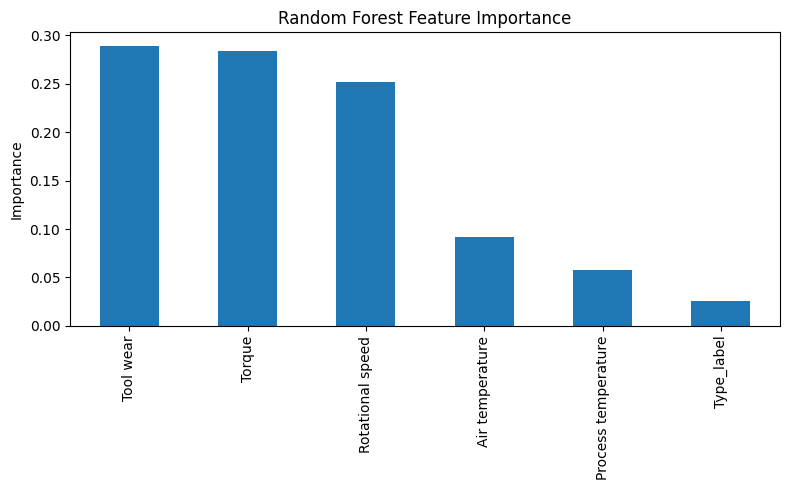

Tool wear              0.288787
Torque                 0.284435
Rotational speed       0.251491
Air temperature        0.091829
Process temperature    0.058105
Type_label             0.025354
dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

target_col = "Machine failure"

X = df_binary.drop(columns=[target_col])

y = df_binary[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1, class_weight="balanced")
rf.fit(X_train, y_train)

print(classification_report(y_test, rf.predict(X_test)))

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
importances.plot(kind="bar")
plt.title("Random Forest Feature Importance")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

importances


In [57]:
import pandas as pd
from scipy.stats import chi2_contingency

# Chi-square test: Type vs target
ct = pd.crosstab(df_binary["Type_label"], df_binary["Machine failure"])
chi2, p, dof, expected = chi2_contingency(ct)

print("Contingency table:\n", ct)
print(f"chi2={chi2:.4f}, dof={dof}, p-value={p:.6g}")

expected_df = pd.DataFrame(expected, index=ct.index, columns=ct.columns)
expected_df


Contingency table:
 Machine failure     0     1
Type_label                 
0                5753  1919
1                2912   404
2                 978    89
chi2=337.6726, dof=2, p-value=4.73518e-74


Machine failure,0,1
Type_label,,
0,6136.963584,1535.036416
1,2652.524927,663.475073
2,853.511489,213.488511


Mutual Information Scores:
Process temperature : 0.333387
Air temperature     : 0.327613
Torque              : 0.264620
Rotational speed    : 0.139329
Tool wear           : 0.081604
Type_label          : 0.013236


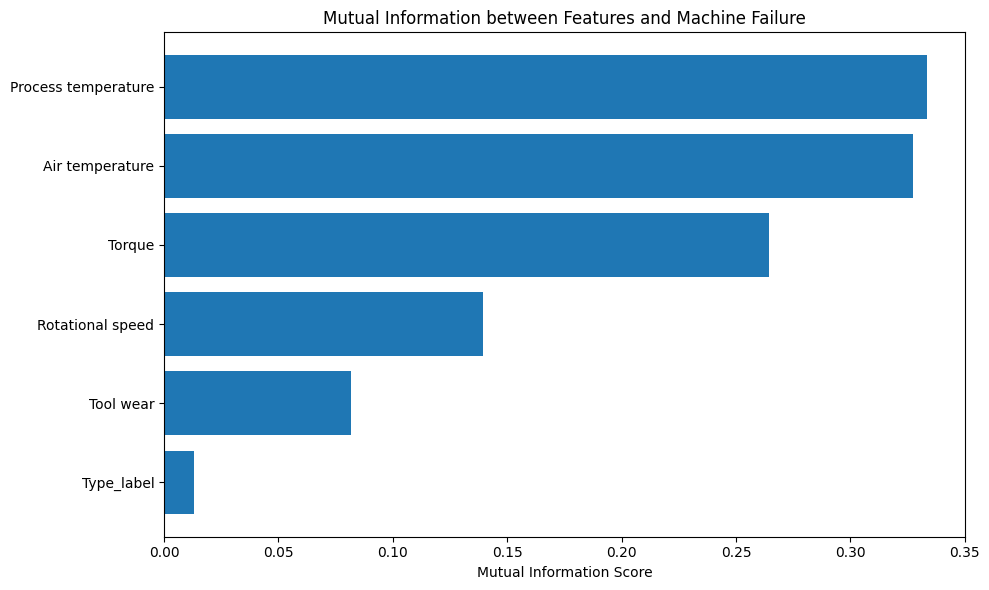

,Feature,MI_Score
1,Process temperature,0.333387
0,Air temperature,0.327613
3,Torque,0.264620
2,Rotational speed,0.139329
4,Tool wear,0.081604
5,Type_label,0.013236


In [58]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt

# Prepare features and target
X = df_binary.drop(columns=["Machine failure"])
y = df_binary["Machine failure"]

# Calculate mutual information scores
mi_scores = mutual_info_classif(X, y, random_state=42)

# Create a dataframe for better visualization
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

print("Mutual Information Scores:")
print("=" * 40)
for idx, row in mi_df.iterrows():
    print(f"{row['Feature']:20s}: {row['MI_Score']:.6f}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['MI_Score'])
plt.xlabel('Mutual Information Score')
plt.title('Mutual Information between Features and Machine Failure')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

mi_df

In [59]:
df_binary.drop(columns=['Type_label'], inplace=True)

In [60]:
df_binary

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure
0,298.100000,308.600000,1551,42.800000,0,0
1,298.200000,308.700000,1408,46.300000,3,0
2,298.100000,308.500000,1498,49.400000,5,0
3,298.200000,308.600000,1433,39.500000,7,0
4,298.200000,308.700000,1408,40.000000,9,0
...,...,...,...,...,...,...
12050,300.183086,310.902076,1528,38.530266,211,1
12051,304.232941,313.350695,1507,36.670591,209,1
12052,299.550889,309.384165,1851,23.841997,225,1
12053,300.858312,311.824711,1523,38.529332,214,1


In [61]:
import numpy as np
import pandas as pd
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

target_col = "Machine failure"

X = df_binary.drop(columns=[target_col])
y = df_binary[target_col]

num_cols = X.select_dtypes(include=["number"]).columns


preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        
    ]
)

pipe = Pipeline([
    ("preprocess", preprocess),
    ("clf", LogisticRegression(max_iter=3000, class_weight="balanced"))
])

space = {
    "C": hp.loguniform("C", np.log(1e-4), np.log(1e2)),
    "solver": hp.choice("solver", ["lbfgs", "liblinear", "saga"]),
    "penalty": hp.choice("penalty", ["l2"]),
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective(params):
    pipe.set_params(
        clf__C=float(params["C"]),
        clf__solver=params["solver"],
        clf__penalty=params["penalty"],
    )
    score = cross_val_score(pipe, X, y, cv=cv, scoring="f1").mean()
    return {"loss": -score, "status": STATUS_OK}

trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=40,
    trials=trials,
    rstate=np.random.default_rng(42)
)

# decode hyperopt choices
solvers = ["lbfgs", "liblinear", "saga"]
penalties = ["l2"]

best_params = {
    "clf__C": float(best["C"]),
    "clf__solver": solvers[best["solver"]],
    "clf__penalty": penalties[best["penalty"]],
}

print("Best params:", best_params)

# fit best pipeline and evaluate
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_pipe = pipe.set_params(**best_params)
best_pipe.fit(X_train, y_train)

y_pred = best_pipe.predict(X_test)
print(classification_report(y_test, y_pred))


100%|██████████| 40/40 [00:03<00:00, 10.89trial/s, best loss: -0.6261939562548363]
Best params: {'clf__C': 27.18878583498014, 'clf__solver': 'liblinear', 'clf__penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      1929
           1       0.50      0.83      0.62       482

    accuracy                           0.80      2411
   macro avg       0.72      0.81      0.74      2411
weighted avg       0.86      0.80      0.81      2411



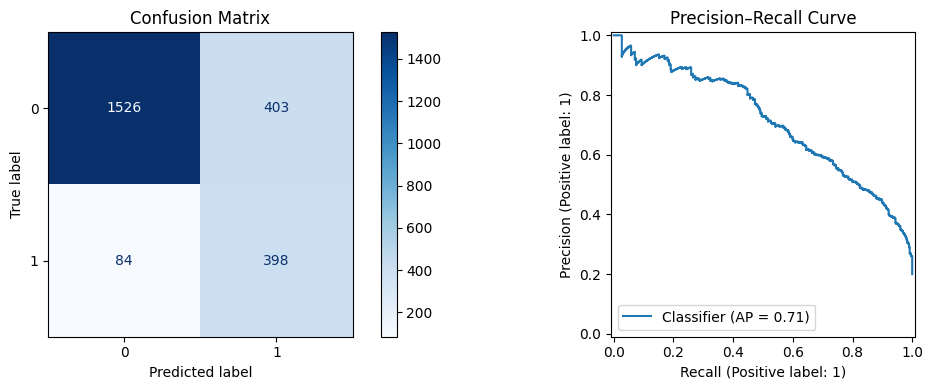

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# assumes you already trained: best_pipe (pipeline) and have X_test, y_test
y_pred = best_pipe.predict(X_test)

# probabilities for PR curve
y_score = best_pipe.predict_proba(X_test)[:, 1]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axes[0], cmap="Blues")
axes[0].set_title("Confusion Matrix")

PrecisionRecallDisplay.from_predictions(y_test, y_score, ax=axes[1])
axes[1].set_title("Precision–Recall Curve")

plt.tight_layout()
plt.show()


In [64]:
y_test.value_counts()

Machine failure
0    1929
1     482
Name: count, dtype: int64

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
import pandas as pd

metrics_list = []

def add_metrics(model_name, y_true, y_pred, y_score=None):
    m = {
        "model": model_name,
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1": f1_score(y_true, y_pred, zero_division=0),
    }
    if y_score is not None:
        m["roc_auc"] = roc_auc_score(y_true, y_score)
        m["pr_auc"] = average_precision_score(y_true, y_score)
    metrics_list.append(m)

# example:
y_pred = best_pipe.predict(X_test)
y_score = best_pipe.predict_proba(X_test)[:, 1]
add_metrics("LogReg", y_test, y_pred, y_score)

metrics_df = pd.DataFrame(metrics_list)
metrics_df


,model,accuracy,precision,recall,f1,roc_auc,pr_auc
0,LogReg,0.798009,0.496879,0.825726,0.620421,0.896858,0.711734


In [69]:
import numpy as np
import pandas as pd
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

target_col = "Machine failure"

X = df_binary.drop(columns=[target_col])
y = df_binary[target_col]

# Get categorical and numerical columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns
num_cols = X.select_dtypes(include=["number"]).columns

# Create preprocessor
if len(cat_cols) > 0:
    preprocess = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), num_cols),
            ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
        ]
    )
else:
    preprocess = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), num_cols)
        ]
    )

# Create pipeline
pipe = Pipeline([
    ("preprocess", preprocess),
    ("clf", RandomForestClassifier(random_state=42, class_weight="balanced", n_jobs=-1))
])

# Define hyperparameter search space
space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 500]),
    "max_depth": hp.choice("max_depth", [None, 10, 20, 30]),
    "min_samples_split": hp.choice("min_samples_split", [2, 5, 10]),
    "min_samples_leaf": hp.choice("min_samples_leaf", [1, 2, 4]),
    "max_features": hp.choice("max_features", ["sqrt", "log2", None])
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective(params):
    pipe.set_params(
        clf__n_estimators=params["n_estimators"],
        clf__max_depth=params["max_depth"],
        clf__min_samples_split=params["min_samples_split"],
        clf__min_samples_leaf=params["min_samples_leaf"],
        clf__max_features=params["max_features"]
    )
    score = cross_val_score(pipe, X, y, cv=cv, scoring="f1").mean()
    return {"loss": -score, "status": STATUS_OK}

# Run hyperparameter optimization
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(42)
)

# Decode hyperopt choices
n_estimators_choices = [100, 200, 300, 500]
max_depth_choices = [None, 10, 20, 30]
min_samples_split_choices = [2, 5, 10]
min_samples_leaf_choices = [1, 2, 4]
max_features_choices = ["sqrt", "log2", None]

best_params = {
    "clf__n_estimators": n_estimators_choices[best["n_estimators"]],
    "clf__max_depth": max_depth_choices[best["max_depth"]],
    "clf__min_samples_split": min_samples_split_choices[best["min_samples_split"]],
    "clf__min_samples_leaf": min_samples_leaf_choices[best["min_samples_leaf"]],
    "clf__max_features": max_features_choices[best["max_features"]]
}

print("Best Random Forest params:", best_params)

# Train final model with best parameters
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_rf_pipe = pipe.set_params(**best_params)
best_rf_pipe.fit(X_train, y_train)

# Evaluate model
y_pred = best_rf_pipe.predict(X_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred))



100%|██████████| 50/50 [02:58<00:00,  3.58s/trial, best loss: -0.9578937489006254]
Best Random Forest params: {'clf__n_estimators': 100, 'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 1, 'clf__max_features': 'sqrt'}

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1929
           1       0.94      0.98      0.96       482

    accuracy                           0.98      2411
   macro avg       0.96      0.98      0.97      2411
weighted avg       0.98      0.98      0.98      2411



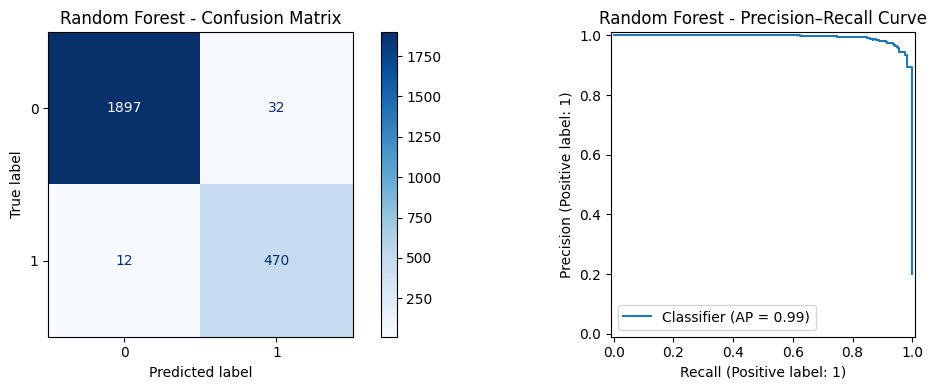


Model Performance Comparison:
          model  accuracy  precision  recall      f1  roc_auc  pr_auc
0        LogReg    0.7980     0.4969  0.8257  0.6204   0.8969  0.7117
1  RandomForest    0.9818     0.9363  0.9751  0.9553   0.9984  0.9933


In [70]:
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Get predictions and probabilities from the Random Forest model
y_pred_rf = best_rf_pipe.predict(X_test)
y_score_rf = best_rf_pipe.predict_proba(X_test)[:, 1]

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[0], cmap="Blues")
axes[0].set_title("Random Forest - Confusion Matrix")

# Precision-Recall Curve
PrecisionRecallDisplay.from_predictions(y_test, y_score_rf, ax=axes[1])
axes[1].set_title("Random Forest - Precision–Recall Curve")

plt.tight_layout()
plt.show()

# Also add Random Forest metrics to the metrics list
add_metrics("RandomForest", y_test, y_pred_rf, y_score_rf)

# Display updated metrics comparison
metrics_df = pd.DataFrame(metrics_list)
print("\nModel Performance Comparison:")
print(metrics_df.round(4))

100%|██████████| 50/50 [01:59<00:00,  2.38s/trial, best loss: -0.9596883081521359]
Best XGBoost params: {'clf__n_estimators': 500, 'clf__max_depth': 6, 'clf__learning_rate': np.float64(0.13028567536263833), 'clf__subsample': np.float64(0.9023822698756683), 'clf__colsample_bytree': np.float64(0.8472211893273287), 'clf__scale_pos_weight': 1}

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1929
           1       0.93      0.98      0.95       482

    accuracy                           0.98      2411
   macro avg       0.96      0.98      0.97      2411
weighted avg       0.98      0.98      0.98      2411



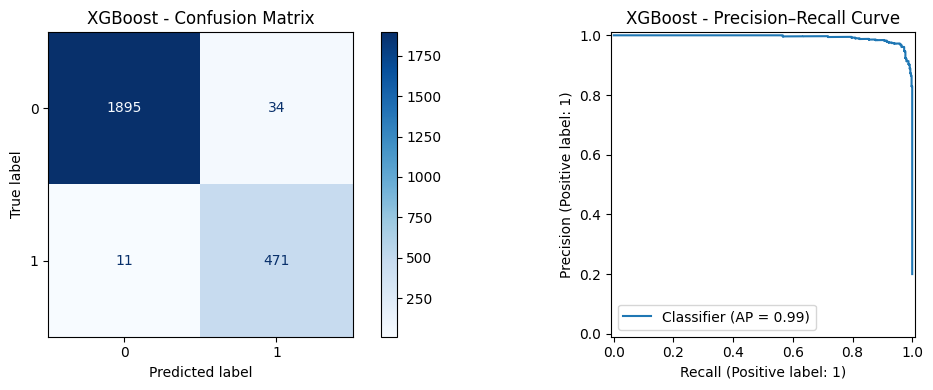


Model Performance Comparison:
          model  accuracy  precision  recall      f1  roc_auc  pr_auc
0        LogReg    0.7980     0.4969  0.8257  0.6204   0.8969  0.7117
1  RandomForest    0.9818     0.9363  0.9751  0.9553   0.9984  0.9933
2       XGBoost    0.9813     0.9327  0.9772  0.9544   0.9984  0.9933


In [71]:
import numpy as np
import pandas as pd
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

target_col = "Machine failure"

X = df_binary.drop(columns=[target_col])
y = df_binary[target_col]

# Get categorical and numerical columns
cat_cols = X.select_dtypes(include=["object", "category"]).columns
num_cols = X.select_dtypes(include=["number"]).columns

# Create preprocessor
if len(cat_cols) > 0:
    preprocess = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), num_cols),
            ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
        ]
    )
else:
    preprocess = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), num_cols)
        ]
    )

# Create pipeline
pipe = Pipeline([
    ("preprocess", preprocess),
    ("clf", XGBClassifier(random_state=42, eval_metric='logloss', enable_categorical=True))
])

# Define hyperparameter search space
space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 500]),
    "max_depth": hp.choice("max_depth", [3, 6, 9, 12]),
    "learning_rate": hp.loguniform("learning_rate", np.log(0.01), np.log(0.3)),
    "subsample": hp.uniform("subsample", 0.6, 1.0),
    "colsample_bytree": hp.uniform("colsample_bytree", 0.6, 1.0),
    "scale_pos_weight": hp.choice("scale_pos_weight", [1, 2, 3, 4, 5])
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def objective(params):
    pipe.set_params(
        clf__n_estimators=params["n_estimators"],
        clf__max_depth=params["max_depth"],
        clf__learning_rate=params["learning_rate"],
        clf__subsample=params["subsample"],
        clf__colsample_bytree=params["colsample_bytree"],
        clf__scale_pos_weight=params["scale_pos_weight"]
    )
    score = cross_val_score(pipe, X, y, cv=cv, scoring="f1").mean()
    return {"loss": -score, "status": STATUS_OK}

# Run hyperparameter optimization
trials = Trials()
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(42)
)

# Decode hyperopt choices
n_estimators_choices = [100, 200, 300, 500]
max_depth_choices = [3, 6, 9, 12]
scale_pos_weight_choices = [1, 2, 3, 4, 5]

best_params = {
    "clf__n_estimators": n_estimators_choices[best["n_estimators"]],
    "clf__max_depth": max_depth_choices[best["max_depth"]],
    "clf__learning_rate": best["learning_rate"],
    "clf__subsample": best["subsample"],
    "clf__colsample_bytree": best["colsample_bytree"],
    "clf__scale_pos_weight": scale_pos_weight_choices[best["scale_pos_weight"]]
}

print("Best XGBoost params:", best_params)

# Train final model with best parameters
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

best_xgb_pipe = pipe.set_params(**best_params)
best_xgb_pipe.fit(X_train, y_train)

# Evaluate model
y_pred_xgb = best_xgb_pipe.predict(X_test)
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Visualize results
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

# Get predictions and probabilities from XGBoost
y_score_xgb = best_xgb_pipe.predict_proba(X_test)[:, 1]

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, ax=axes[0], cmap="Blues")
axes[0].set_title("XGBoost - Confusion Matrix")

# Precision-Recall Curve
PrecisionRecallDisplay.from_predictions(y_test, y_score_xgb, ax=axes[1])
axes[1].set_title("XGBoost - Precision–Recall Curve")

plt.tight_layout()
plt.show()

# Add XGBoost metrics to comparison
add_metrics("XGBoost", y_test, y_pred_xgb, y_score_xgb)

# Display updated metrics comparison
metrics_df = pd.DataFrame(metrics_list)
print("\nModel Performance Comparison:")
print(metrics_df.round(4))

In [ ]:
# if you trained an XGBoost model named xgb_model
# option 1: native XGBoost format
xgb_model.save_model("xgboost_model.json")

# option 2: joblib (works for sklearn API)
import joblib
joblib.dump(xgb_model, "xgboost_model.pkl")


In [72]:
# Save the XGBoost model using joblib (recommended for sklearn pipelines)
import joblib

# Save the entire pipeline (includes preprocessing + XGBoost model)
joblib.dump(best_xgb_pipe, "xgboost_pipeline_model.pkl")


['xgboost_pipeline_model.pkl']

# Multi classification 

In [73]:
df_resampled.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,failure type,Machine failure
0,M,298.1,308.6,1551,42.8,0,None,0
1,L,298.2,308.7,1408,46.3,3,None,0
2,L,298.1,308.5,1498,49.4,5,None,0
3,L,298.2,308.6,1433,39.5,7,None,0
4,L,298.2,308.7,1408,40.0,9,None,0


In [74]:
df_multic = df_resampled.copy()
df_multic.drop(columns=['Machine failure','Type'], inplace=True)

In [75]:
df_multic.head()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,failure type
0,298.1,308.6,1551,42.8,0,None
1,298.2,308.7,1408,46.3,3,None
2,298.1,308.5,1498,49.4,5,None
3,298.2,308.6,1433,39.5,7,None
4,298.2,308.7,1408,40.0,9,None
